In [1]:
library(immunarch)  # Load the package into R
immdata <- repLoad("/corgi/martin/R/patient1/")

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: dtplyr

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: patchwork


== Step 1/3: loading repertoire files... ==


Processing "/corgi/martin/R/patient1/" ...

  -- [1/12] Parsing "/corgi/martin/R/patient1//N1_IGG.txt" -- 
mixcr

  -- [2/12] Parsing "/corgi/martin/R/patient1//N1_IGK.txt" -- 
mixcr

  -- [3/12] Parsing "/corgi/martin/R/patient1//N1_IGL.txt" -- 
mixcr

  -- [4/12] Parsing "/corgi/martin/R/patient1//N1_IGM.txt" -- 
mixcr

  -- [5/12] Parsing "/corgi/martin/R/patient1//P1_IGG.txt" -- 
mixcr

  -- [6/12] Parsing "/corgi/martin/R/patient1//P1_IGK.txt" -- 


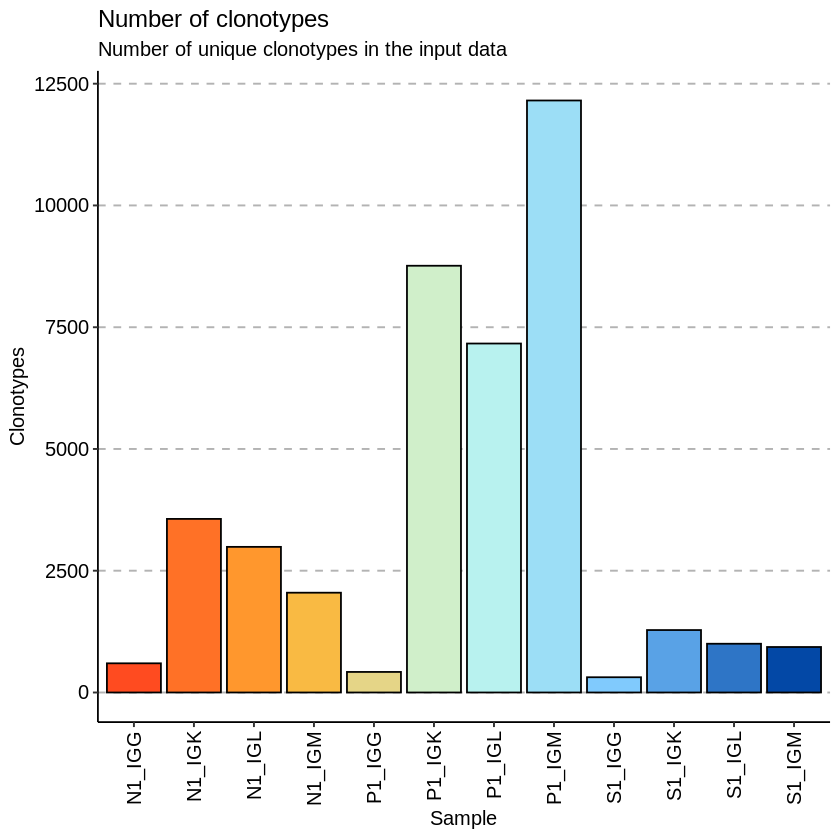

In [11]:
exp_vol <- repExplore(immdata$data, .method = "volume")
p1 <- vis(exp_vol, .title = "")
p1 
ggsave(filename = "FIGURE_clonotype_p1.png", plot = p1, width = 4.8, height = 4.5, dpi = 600)

Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”


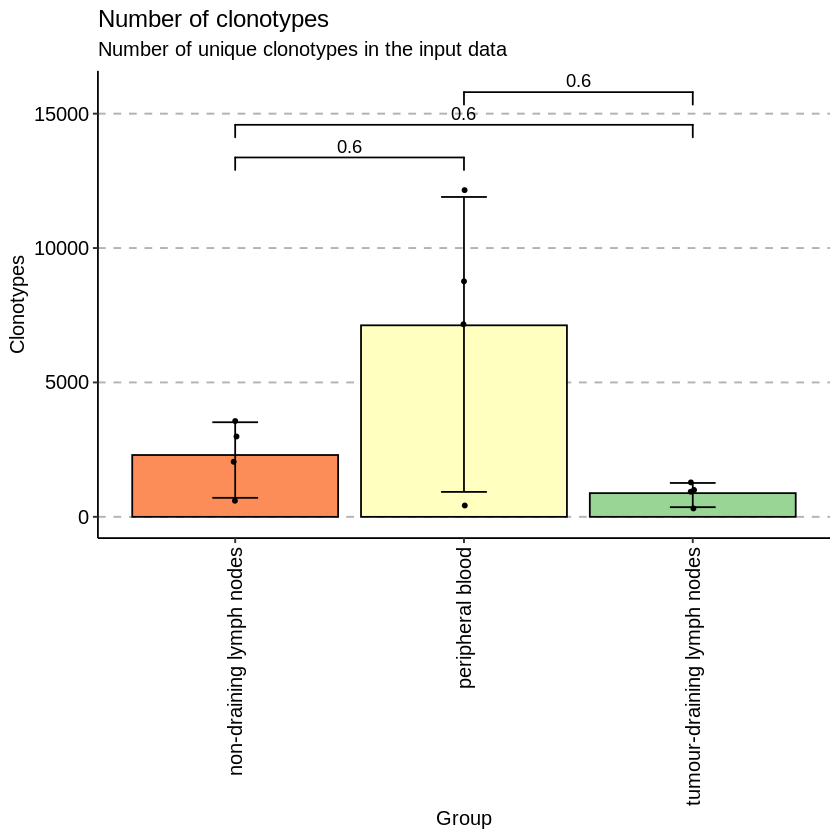

In [16]:
exp_vol <- repExplore(immdata$data, .method = "volume")
by_vec <- c("non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "peripheral blood", "peripheral blood", "peripheral blood", "peripheral blood", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes")
p <- vis(exp_vol, .by = by_vec)
p

In [ ]:
exp_vol <- repExplore(immdata$data, .method = "volume")
by_vec <- c("non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "peripheral blood", "peripheral blood", "peripheral blood", "peripheral blood", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes")
p <- vis(exp_vol, .by = by_vec)
p

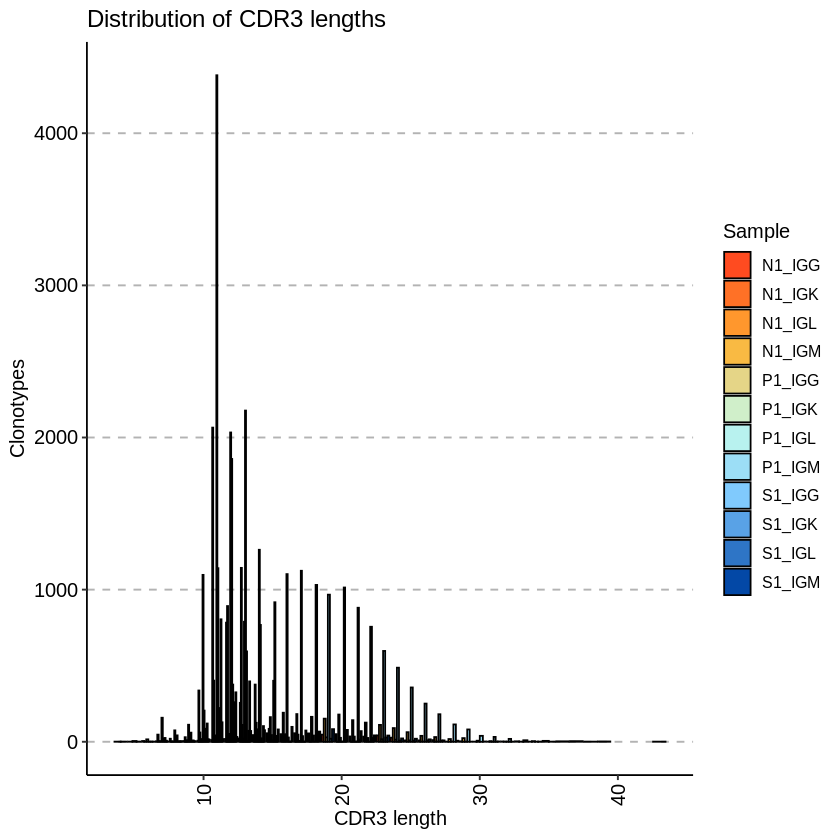

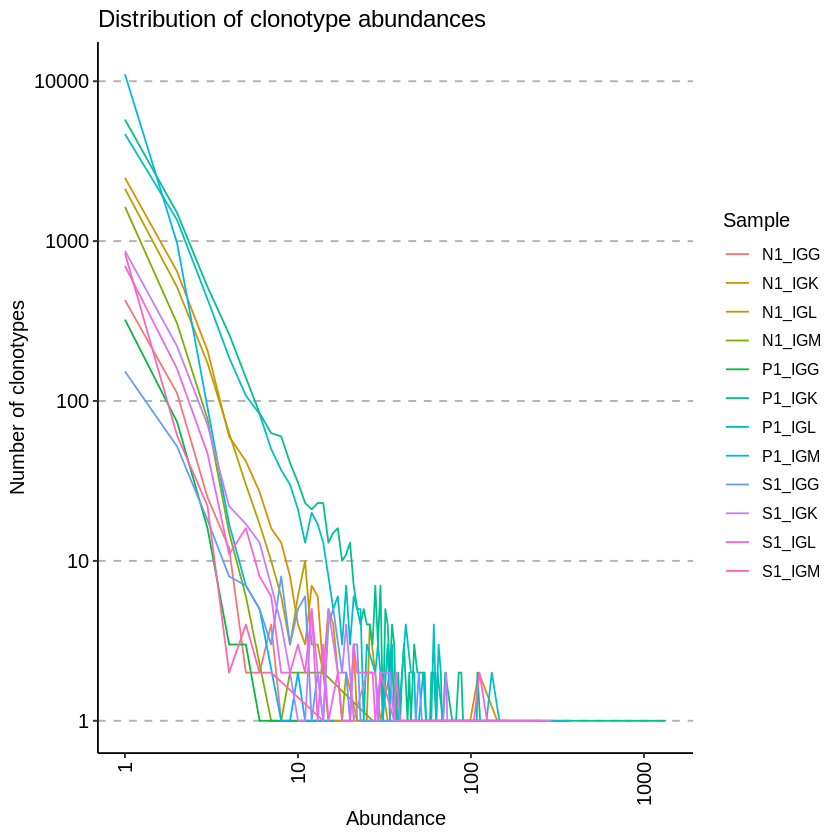

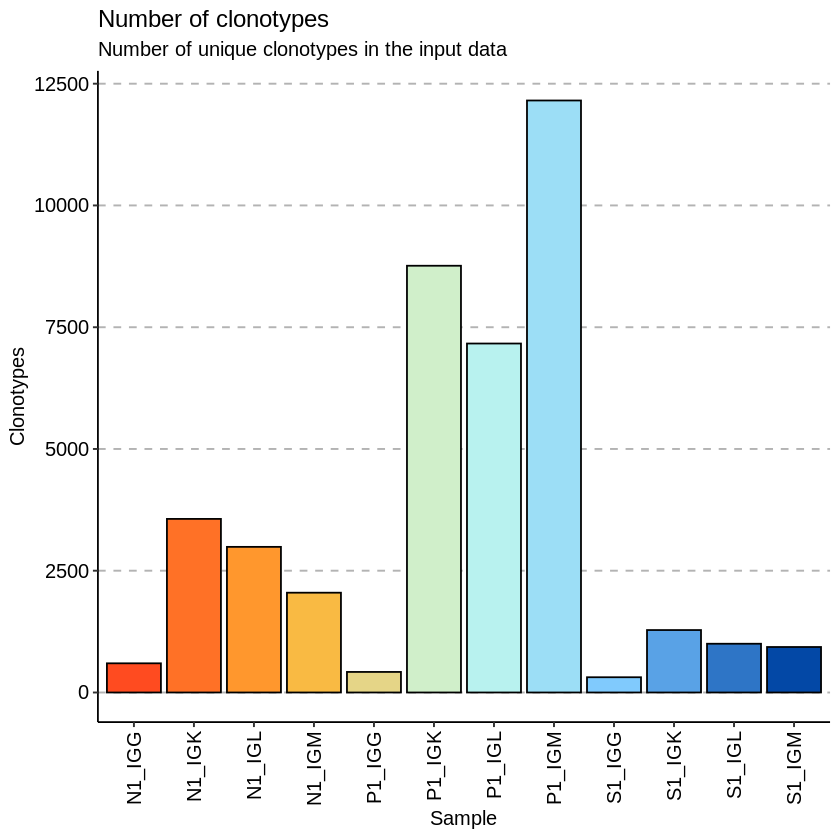

In [4]:
exp_len <- repExplore(immdata$data, .method = "len", .col = "aa")
exp_cnt <- repExplore(immdata$data, .method = "count")
exp_vol <- repExplore(immdata$data, .method = "volume")

p1 <- vis(exp_len)
p2 <- vis(exp_cnt)
p3 <- vis(exp_vol)

p1
p2
p3

In [5]:
#The clonal.prop method computes the proportion of repertoire occupied by the pools of cell clones:
imm_pr <- repClonality(immdata$data, .method = "clonal.prop")
imm_pr

,Clones,Percentage,Clonal.count.prop
N1_IGG,2,17.3,0.003338898
N1_IGK,5,11.0,0.001402918
N1_IGL,10,10.6,0.003344482
N1_IGM,58,10.1,0.028306491
P1_IGG,9,10.1,0.021327014
P1_IGK,9,10.5,0.001027163
P1_IGL,8,10.2,0.001116539
P1_IGM,565,10.0,0.046482929
S1_IGG,2,12.2,0.006389776
S1_IGK,2,11.6,0.001560062


In [6]:
# The top method considers the most abundant cell clonotypes:
imm_top <- repClonality(immdata$data, .method = "top", .head = c(10, 100, 1000, 3000, 10000))
imm_top

,10,100,1000,3000,10000
N1_IGG,0.463942308,0.65745192,1.0000000,1.0000000,1.0000000
N1_IGK,0.164691459,0.32134587,0.6402397,0.9231712,1.0000000
N1_IGL,0.105512961,0.27108434,0.6367287,1.0000000,1.0000000
N1_IGM,0.038736367,0.14817601,0.6054908,1.0000000,1.0000000
P1_IGG,0.105719237,0.44194107,1.0000000,1.0000000,1.0000000
P1_IGK,0.109670749,0.30578972,0.5918960,0.7708366,1.0000000
P1_IGL,0.116049383,0.31873323,0.5820719,0.7764359,1.0000000
P1_IGM,0.006531582,0.02909523,0.1646255,0.3204928,0.8400505
S1_IGG,0.359610275,0.87555359,1.0000000,1.0000000,1.0000000
S1_IGK,0.278256922,0.63458920,0.9359964,1.0000000,1.0000000


In [7]:
# While the rare method deals with the least prolific clonotypes:
imm_rare <- repClonality(immdata$data, .method = "rare")
imm_rare

,1,3,10,30,100,MAX
N1_IGG,0.25721154,0.4368990,0.5006010,0.5360577,0.7548077,1
N1_IGK,0.33878218,0.5993734,0.7274213,0.8199155,0.8897970,1
N1_IGL,0.38791530,0.6710478,0.8004746,0.8882804,0.9746258,1
N1_IGM,0.61602106,0.9330575,0.9793155,1.0000000,1.0000000,1
P1_IGG,0.55979203,0.8994801,0.9566724,1.0000000,1.0000000,1
P1_IGK,0.22908382,0.4101320,0.5633052,0.7115874,0.8459917,1
P1_IGL,0.25099302,0.4665593,0.6228663,0.7295760,0.8659689,1
P1_IGM,0.82052995,0.9853782,0.9979960,1.0000000,1.0000000,1
S1_IGG,0.06775908,0.1377325,0.2524358,0.5248007,0.8777679,1
S1_IGK,0.19723105,0.3454380,0.4271448,0.5633227,0.8365865,1


In [8]:
# Finally, the homeo method assesses the clonal space homeostasis, i.e., the proportion of the repertoire occupied by the clones of a given size:
imm_hom <- repClonality(immdata$data,
  .method = "homeo",
  .clone.types = c(Small = .0001, Medium = .001, Large = .01, Hyperexpanded = 1)
)
imm_hom

,Small (0 < X <= 1e-04),Medium (1e-04 < X <= 0.001),Large (0.001 < X <= 0.01),Hyperexpanded (0.01 < X <= 1)
N1_IGG,0.0000000,0.2572115,0.25180288,0.49098558
N1_IGK,0.0000000,0.6979975,0.14384961,0.15815284
N1_IGL,0.0000000,0.7444323,0.19331873,0.06224900
N1_IGM,0.0000000,0.8461828,0.14366303,0.01015419
P1_IGG,0.0000000,0.0000000,0.94627383,0.05372617
P1_IGK,0.3484571,0.3361699,0.26200891,0.05336408
P1_IGL,0.2509930,0.4331723,0.23043478,0.08539989
P1_IGM,0.8205299,0.1782825,0.00118756,0.00000000
S1_IGG,0.0000000,0.1138175,0.35163862,0.53454384
S1_IGK,0.0000000,0.3654108,0.25783023,0.37675897


Using Sample as id variables

Using Sample as id variables



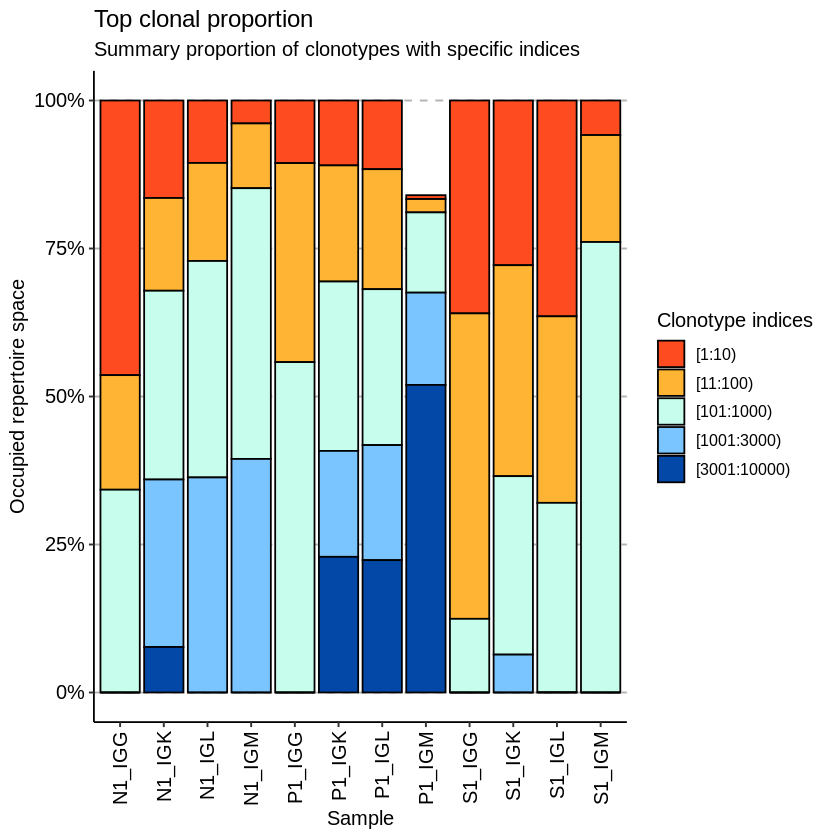

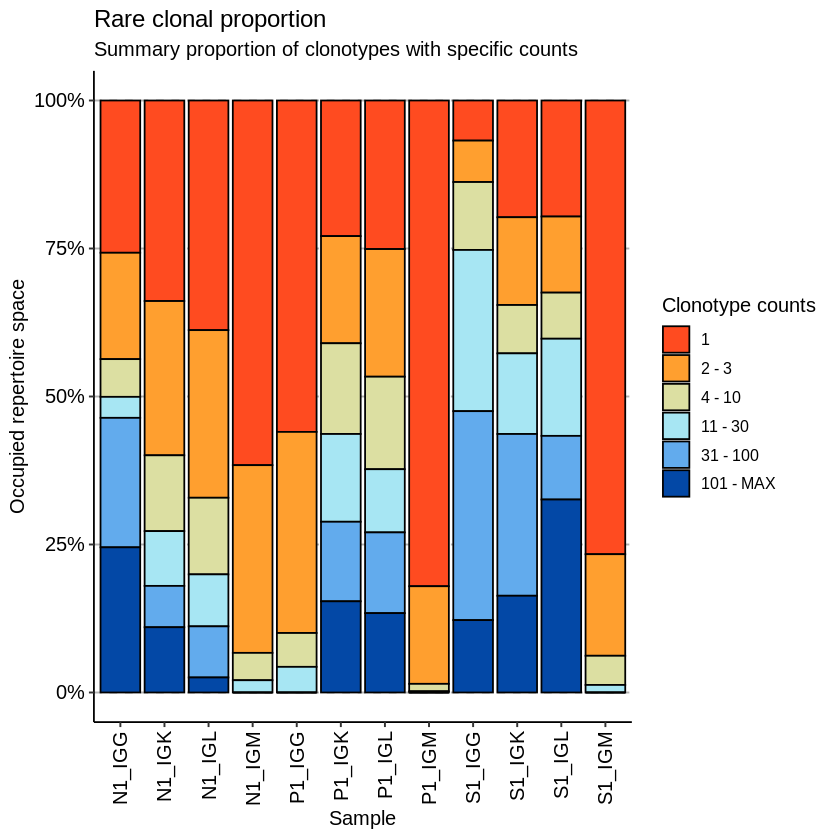

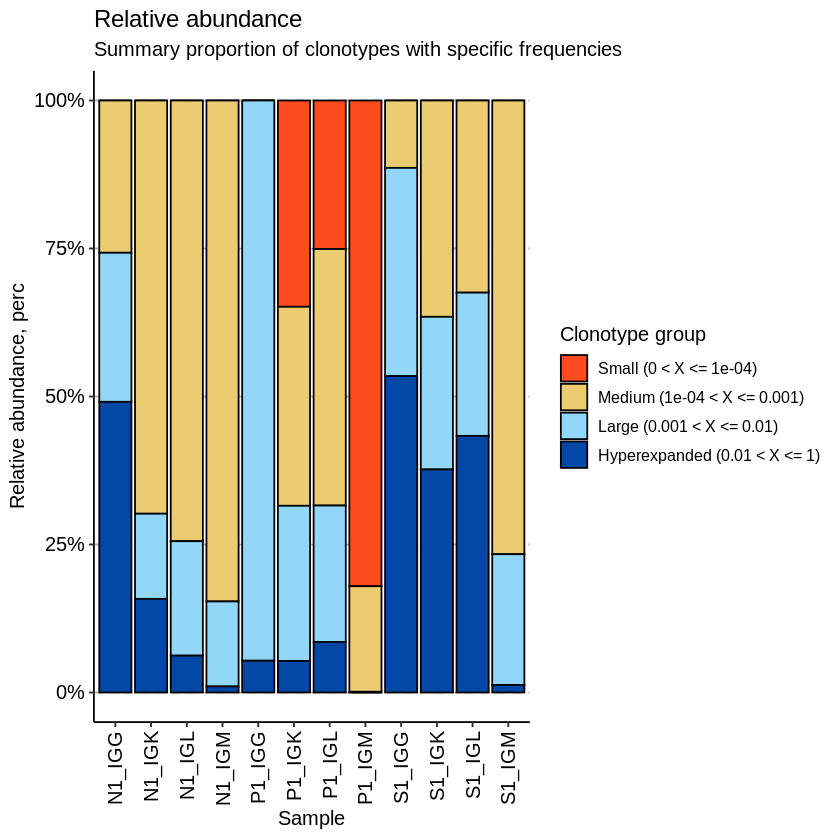

In [13]:
p1 <- vis(imm_top)
p2 <- vis(imm_rare)
p3 <- vis(imm_hom)
p1
p2
p3

ggsave(filename = "FIGURE_abundancy_p1.png", plot = p3, width = 6, height = 5, dpi = 600)

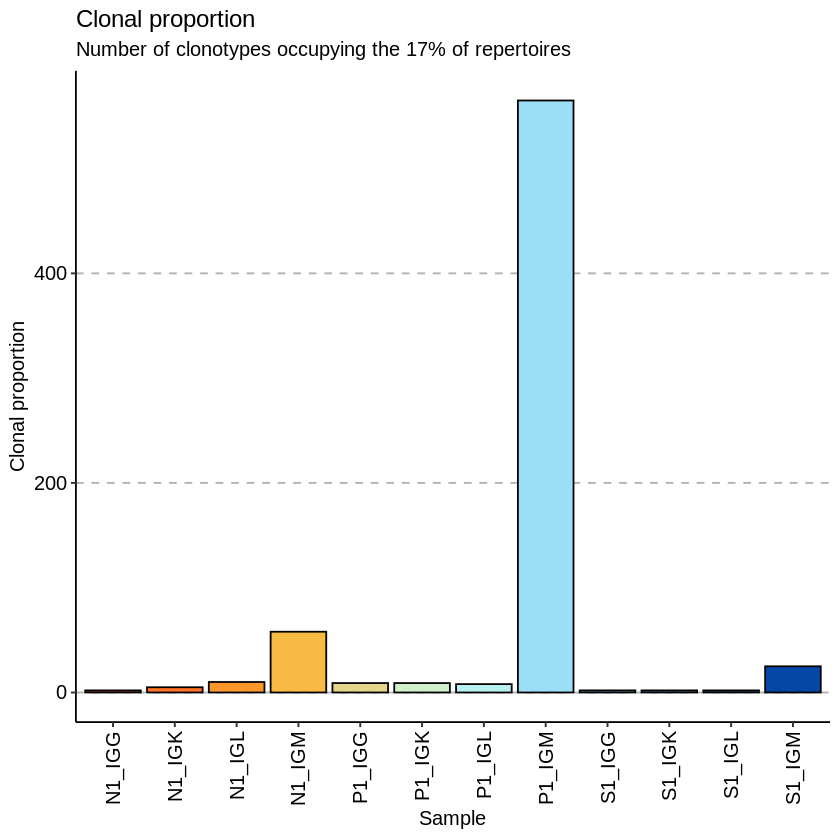

In [2]:
imm_pr <- repClonality(immdata$data, .method = "clonal.prop")
vis(imm_pr)

In [10]:
gene_stats()

alias,species,ighd,ighj,ighv,igij,igkj,igkv,iglj,iglv,traj,trav,trbd,trbj,trbv,trdd,trdj,trdv,trgj,trgv
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bt,BosTaurus,21,4,25,0,1,6,5,26,46,0,0,0,0,5,3,0,6,15
cd,CamelusDromedarius,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2
clf,CanisLupusFamiliaris,0,0,0,0,0,0,0,0,0,0,2,8,19,0,0,0,7,8
dr,DanioRerio,7,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hs,HomoSapiens,30,13,248,0,5,64,7,69,57,60,3,14,64,3,4,6,4,10
macmul,MacacaMulatta,24,7,19,0,4,83,5,0,0,0,2,15,58,0,0,0,0,0
mmc,MusMusculusCastaneus,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
mmd,MusMusculusDomesticus,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
musmus,MusMusculus,32,8,225,0,8,109,3,5,42,145,2,14,23,2,3,7,0,11


In [11]:
imm_gu <- geneUsage(immdata$data, "hs.trbv")
imm_gu

Names,N1_IGG,N1_IGK,N1_IGL,N1_IGM,P1_IGG,P1_IGK,P1_IGL,P1_IGM,S1_IGG,S1_IGK,S1_IGL,S1_IGM
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
IGHV1-17,NA,NA,NA,NA,NA,NA,NA,2,NA,NA,NA,NA
IGHV1-18,27,NA,NA,89,33,NA,NA,694,18,NA,NA,53
"IGHV1-18, IGHV1-2, IGHV1-3",NA,NA,NA,NA,NA,NA,NA,4,NA,NA,NA,NA
"IGHV1-18, IGHV1-2, IGHV1-46",NA,NA,NA,NA,NA,NA,NA,6,NA,NA,NA,NA
"IGHV1-18, IGHV1-2, IGHV1-8",NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,1
"IGHV1-18, IGHV1-2, IGHV3-11",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
"IGHV1-18, IGHV1-46",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
"IGHV1-18, IGHV1-69, IGHV1-67",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
IGHV1-2,34,NA,NA,119,25,NA,NA,680,16,NA,NA,36


Using Names as id variables

Warning message:
“Removed 9 rows containing missing values (geom_bar).”


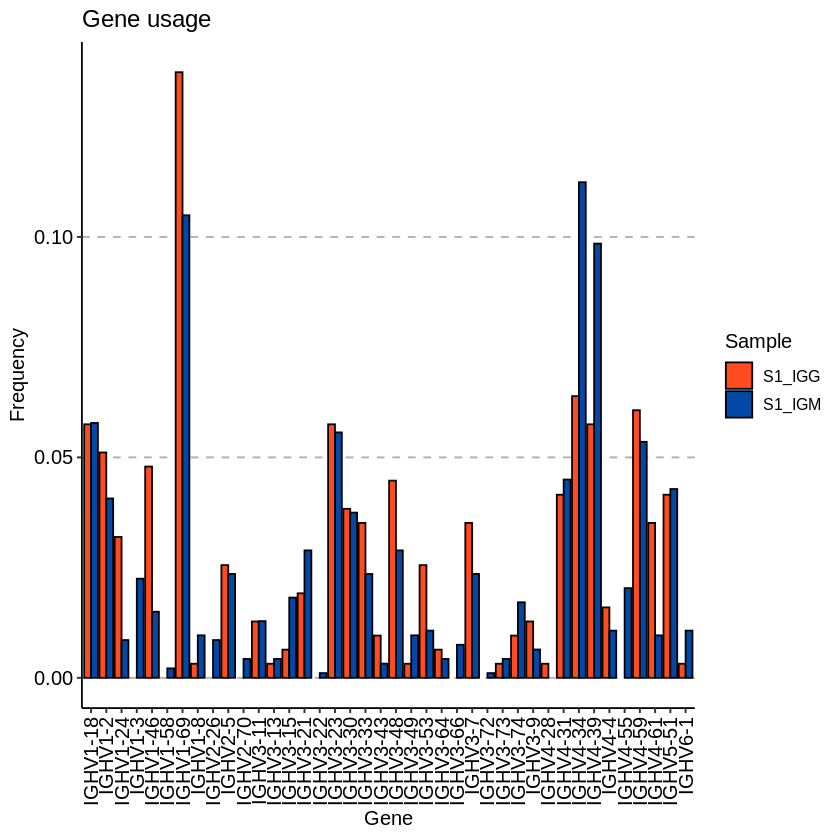

In [80]:
# Compute the distribution of  two selected samples
imm_gu <- geneUsage(immdata$data[c(9, 12)], "hs.trbv", .norm = T, .ambig = "maj")

vis(imm_gu)

Using Names as id variables

Warning message:
“Removed 51 rows containing missing values (geom_bar).”


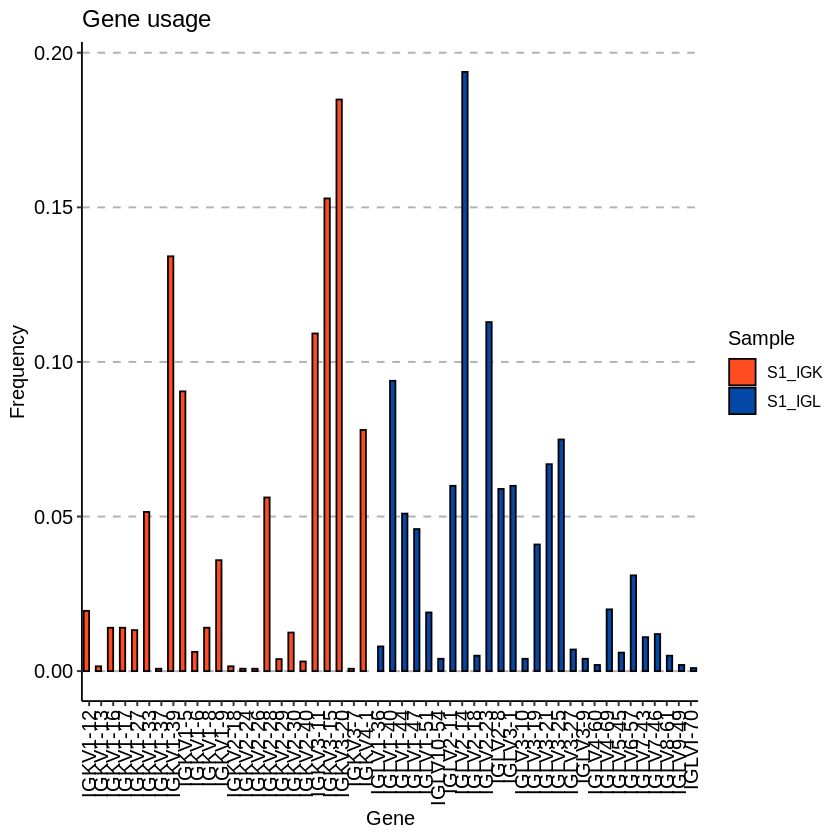

In [81]:
# Compute the distribution of the first two samples
imm_gu <- geneUsage(immdata$data[c(10, 11)], "hs.trbv", .norm = T, .ambig = "maj")

vis(imm_gu)

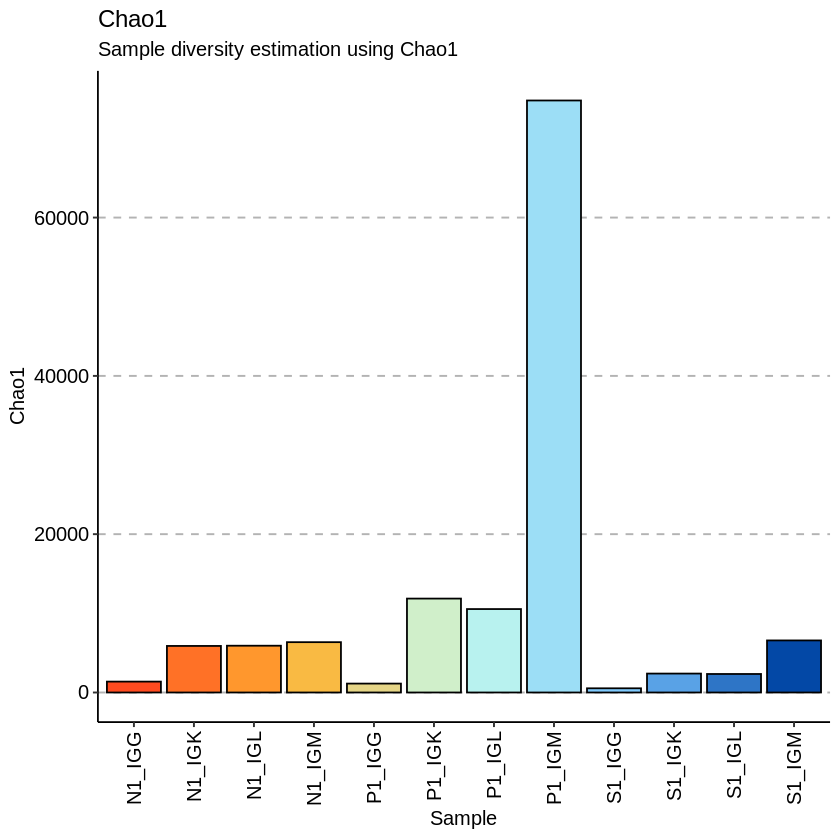

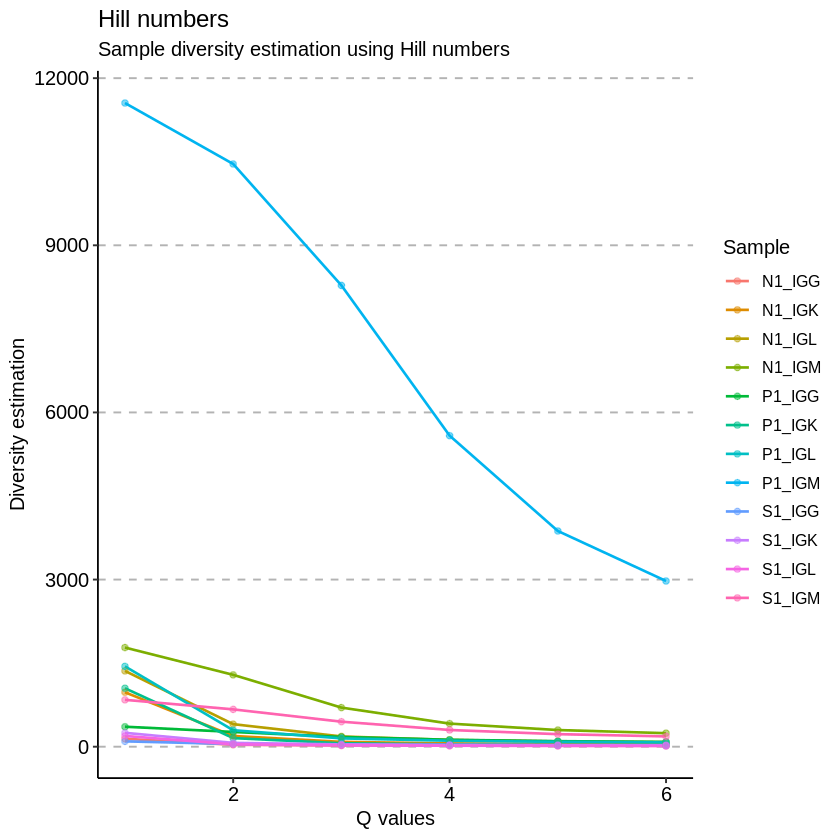

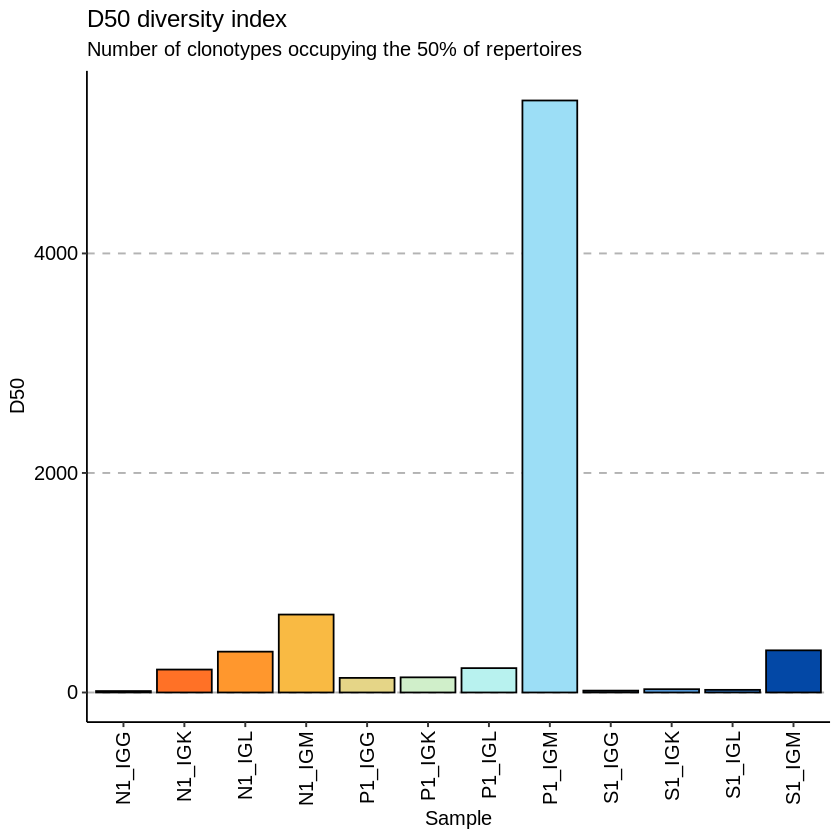

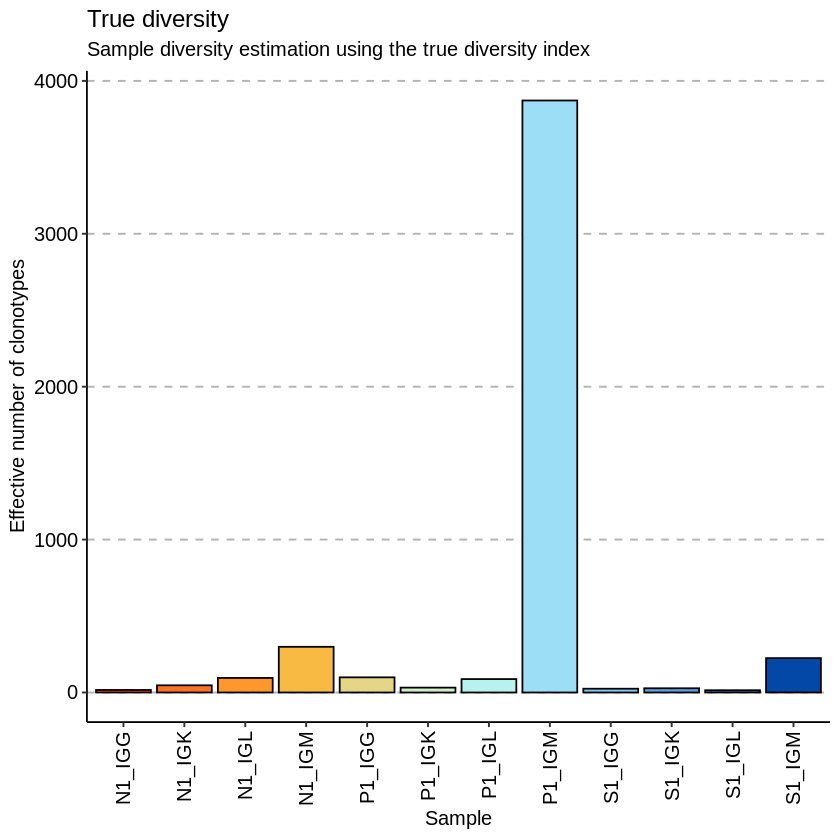

In [3]:
# Compute statistics and visualise them
# Chao1 diversity measure
div_chao <- repDiversity(immdata$data, "chao1")

# Hill numbers
div_hill <- repDiversity(immdata$data, "hill")

# D50
div_d50 <- repDiversity(immdata$data, "d50")

# Ecological diversity measure
div_div <- repDiversity(immdata$data, "div")

p1 <- vis(div_chao)
p2 <- vis(div_hill)
p3 <- vis(div_d50)
p4 <- vis(div_div)

p1
p2
p3
p4

ggsave(filename = "FIGURE_div50_p1.png", plot = p3, width = 4.8, height = 4.5, dpi = 600)

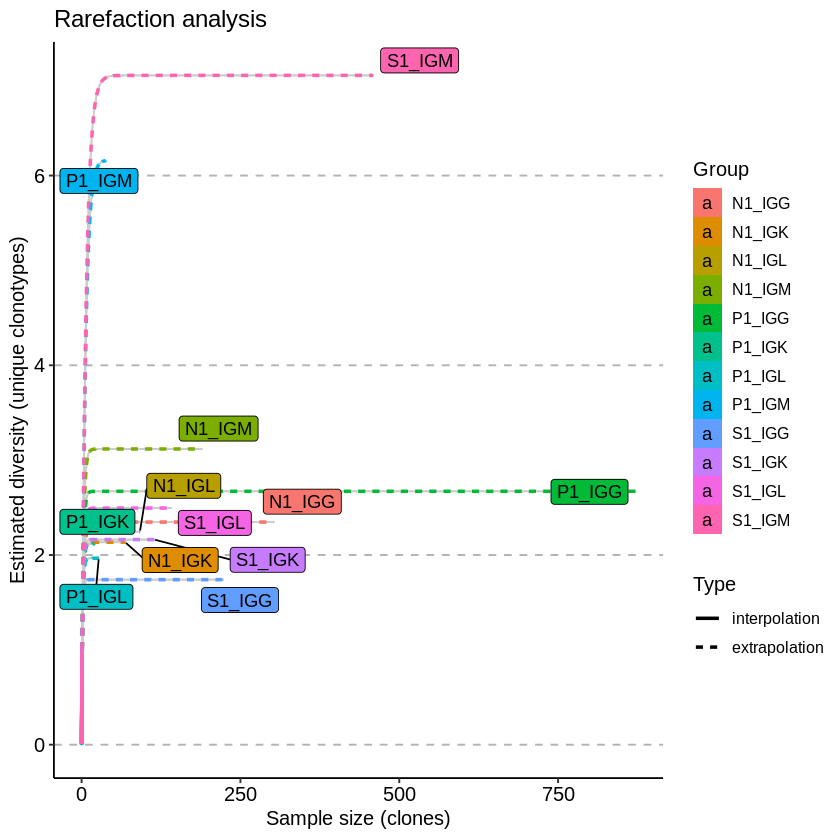

In [13]:
imm_raref <- repDiversity(immdata$data, "raref", .verbose = F)

p1 <- vis(imm_raref)
p1

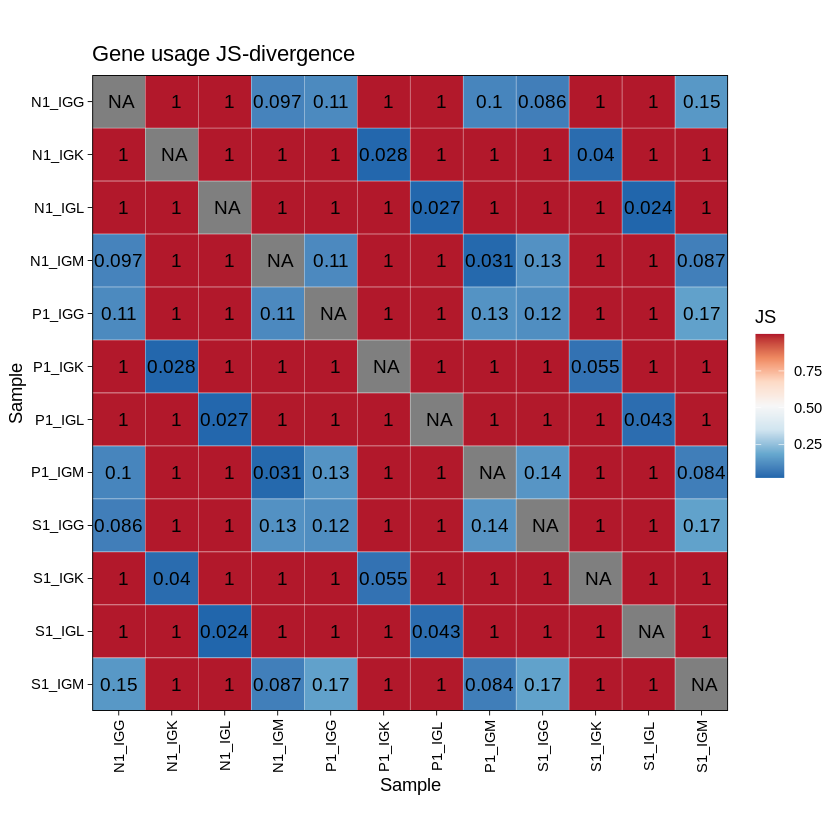

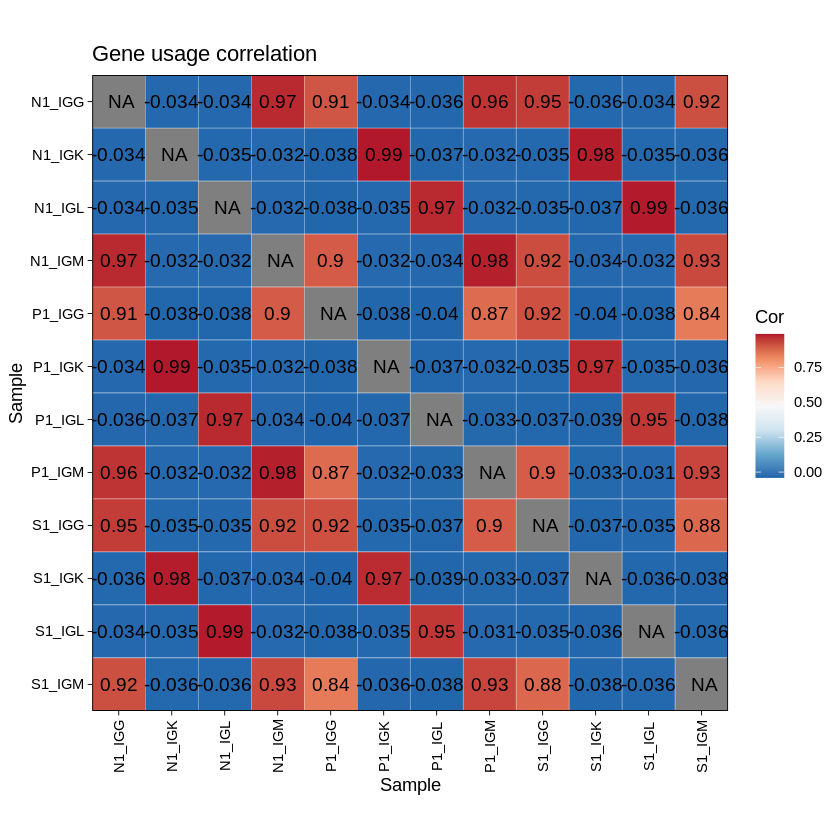

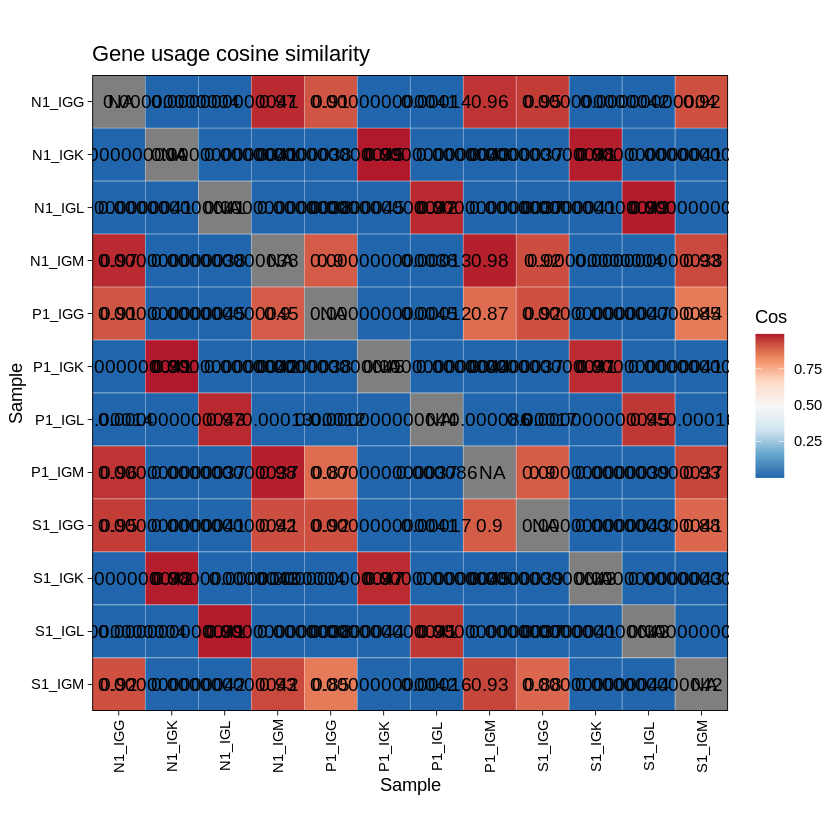

In [48]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)

imm_gu_js <- geneUsageAnalysis(imm_gu, .method = "js", .verbose = F)
imm_gu_cor <- geneUsageAnalysis(imm_gu, .method = "cor", .verbose = F)
imm_gu_cos <- geneUsageAnalysis(imm_gu, .method = "cosine", .verbose = F)

p1 <- vis(imm_gu_js, .title = "Gene usage JS-divergence", .leg.title = "JS", .text.size = 4)
p2 <- vis(imm_gu_cor, .title = "Gene usage correlation", .leg.title = "Cor", .text.size = 4)
p3 <- vis(imm_gu_cos, .title = "Gene usage cosine similarity", .leg.title = "Cos", .text.size = 4)

p1
p2
p3

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


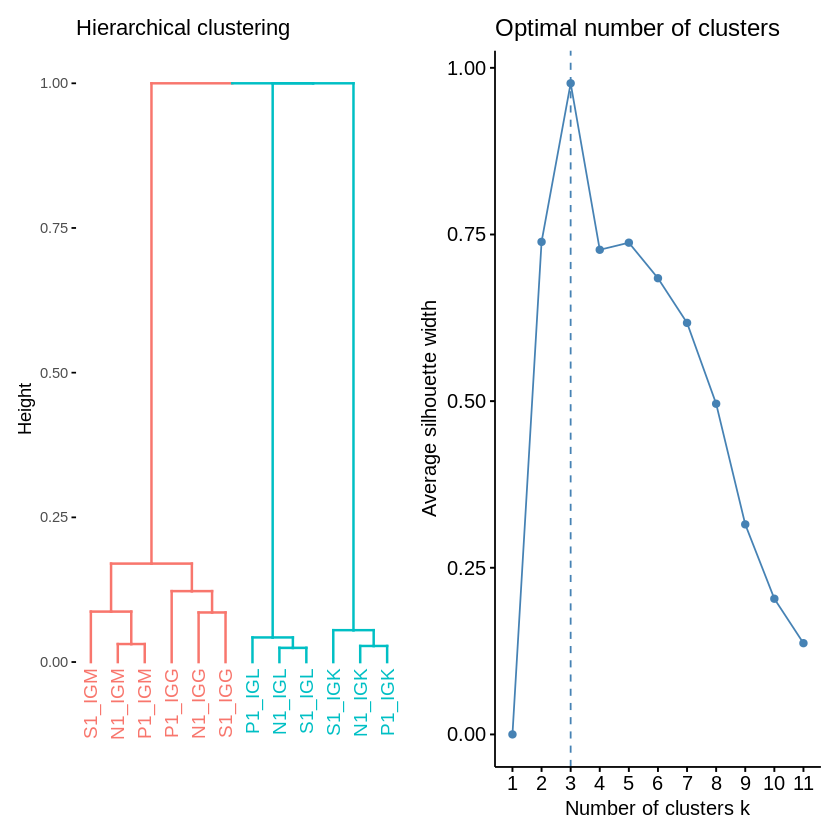

In [15]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)
vis(imm_gu_js <- geneUsageAnalysis(imm_gu, .method = "js+hclust", .verbose = F))

In [64]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)
vis(imm_gu_js <- geneUsageAnalysis(imm_gu, .method = c("js+anova"), .verbose = F))

ERROR: Error in .command_analysis(commands[2], res): Unknown method for analysis: anova


CDR3.aa,V.name
<chr>,<chr>
CAGGYYYDSSGYYFDYW,IGHV1-69
CARLRSTVYYGMDVW,"IGHV4-59, IGHV4-61"
CARDQSLVAFWSDYPPGDVW,IGHV1-18
CARGLYSYGWHFYYMDVW,"IGHV4-61, IGHV4-59"
CAKDTAMVTWAFDYW,IGHV3-23
CARGEGARSSWYPPISWFDPW,"IGHV4-59, IGHV4-61"
CARDNPGGAWDPPYGMDVW,"IGHV4-39, IGHV4-28, IGHV4-61"
CVRDSPLASSGIYYFAMDAW,"IGHV4-61, IGHV4-59"
CARGSSGWTNWFDPW,IGHV3-13


Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, V.name, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


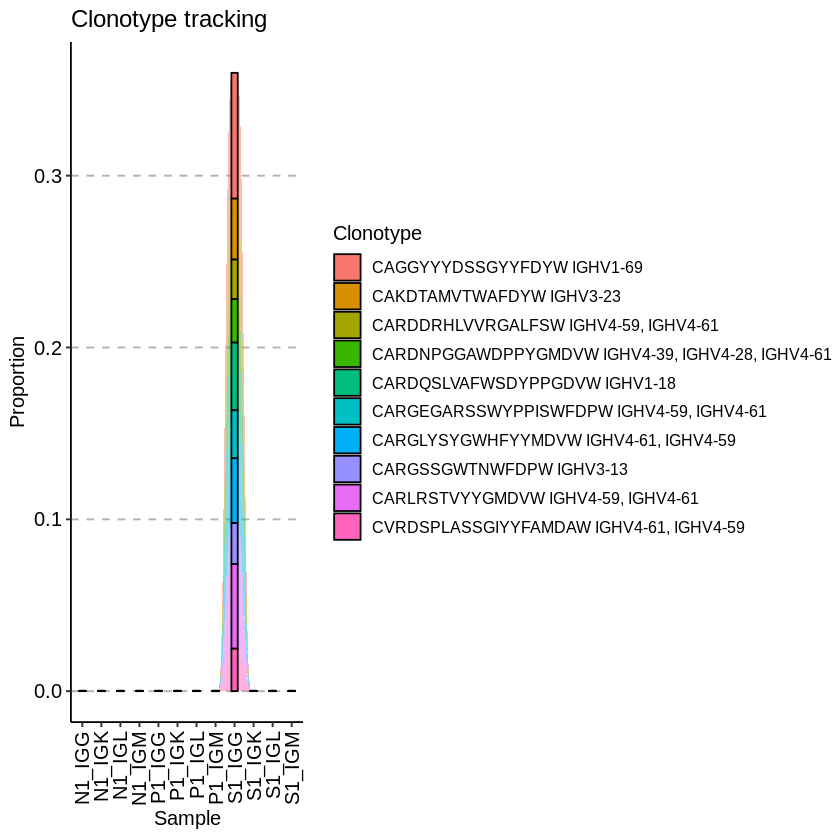

In [24]:
target <- immdata$data[[9]] %>%
  select(CDR3.aa, V.name) %>%
  head(10)

target

tc <- trackClonotypes(immdata$data, target)
vis(tc)

CDR3.aa,V.name
<chr>,<chr>
CQQYYSTPWTF,IGKV4-1
CQQYNSYPYTF,IGKV1-5
CQQTYSTPRTF,IGKV1-39
CMQALQSPPTF,IGKV2-28
CQQYSMSPPWTF,"IGKV3-20, IGKV3-11"
CQQGNNFPRTF,IGKV1-12
CQQSYSAPPTF,IGKV1-39
CQQSYSSPPTF,IGKV1-39
CQQSYNTPTWTF,IGKV1-39


Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, V.name, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


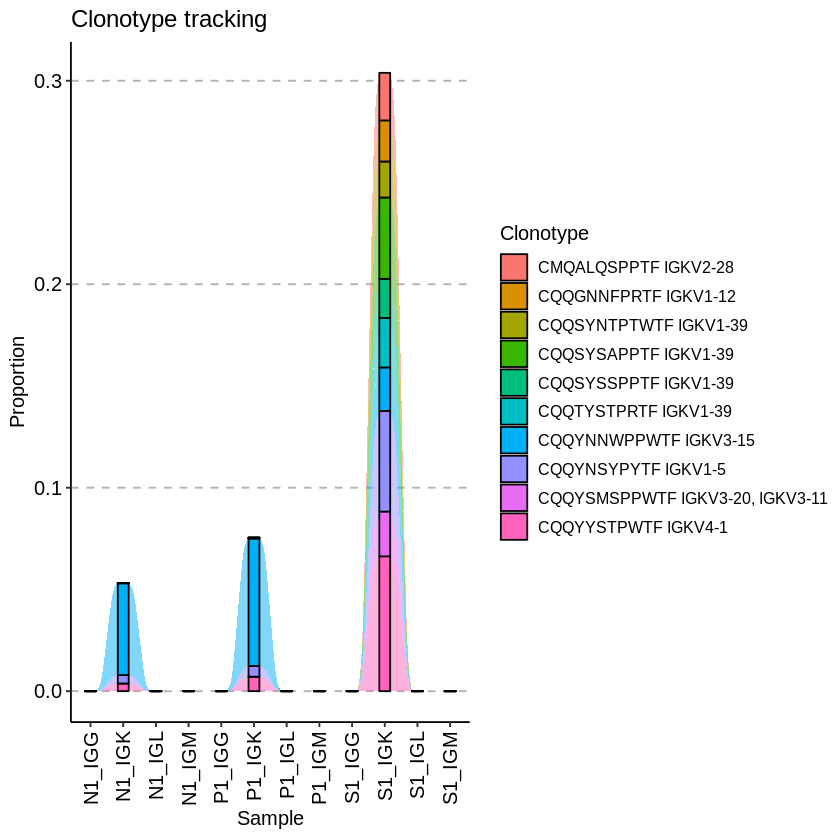

In [25]:
target <- immdata$data[[10]] %>%
  select(CDR3.aa, V.name) %>%
  head(10)

target

tc <- trackClonotypes(immdata$data, target)
vis(tc)

CDR3.aa,V.name
<chr>,<chr>
CCSYAGSYTFEWVF,IGLV2-11
CQTWGTGILVF,IGLV4-69
CCSYAGSYTFEWVF,"IGLV2-11, IGLV2-8"
CQSADNIGPYVVF,IGLV3-25
CAAWDDSLSGVF,"IGLV1-47, IGLV1-44"
CSSYAGSNNFKMF,"IGLV2-8, IGLV2-11"
CSSYRTSIALVF,"IGLV2-14, IGLV2-23, IGLV2-8"
CQSYDSSLSGSAVF,IGLV1-40
CGTWDSSLSTWVF,IGLV1-51


Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, V.name, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


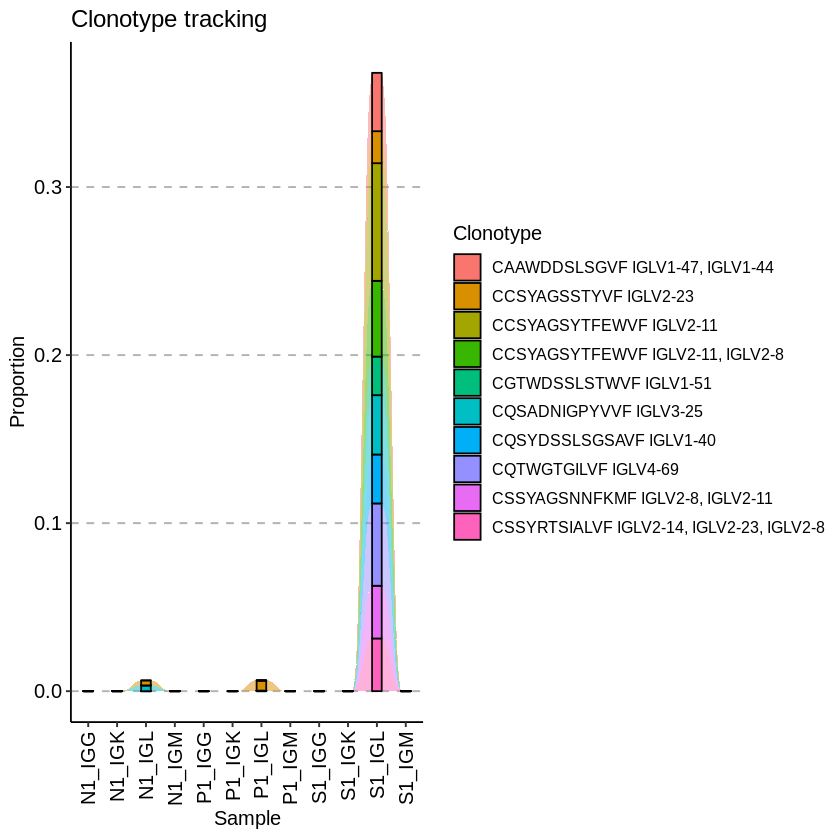

In [26]:
target <- immdata$data[[11]] %>%
  select(CDR3.aa, V.name) %>%
  head(10)

target

tc <- trackClonotypes(immdata$data, target)
vis(tc)

CDR3.aa,V.name
<chr>,<chr>
CARGRGDAVDYW,IGHV3-48
CARGDATYSDFWSGQQNRVFYFDFW,IGHV4-34
CARTGSGSFYFDSW,"IGHV4-31, IGHV4-61"
CARGGDFAENKLWGGASDIW,"IGHV3-33, IGHV3-30"
CASPSIAAAGTVFDYW,IGHV1-69
CASSFRGVEGFDYYYGMDVW,IGHV1-69
CARGGDFAENKLWGGAFDIW,"IGHV3-33, IGHV3-30"
CAHLKGKTLQYDGMDVW,IGHV2-5
CARLDPRYGDYSLHW,IGHV4-39


Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, V.name, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


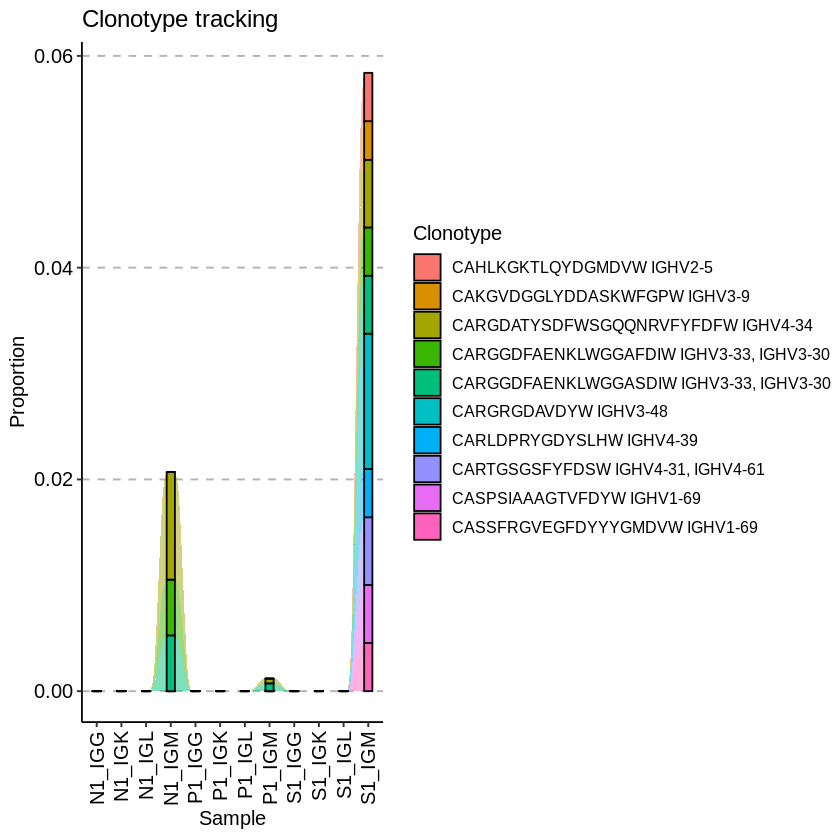

In [27]:
target <- immdata$data[[12]] %>%
  select(CDR3.aa, V.name) %>%
  head(10)

target

tc <- trackClonotypes(immdata$data, target)
vis(tc)

Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


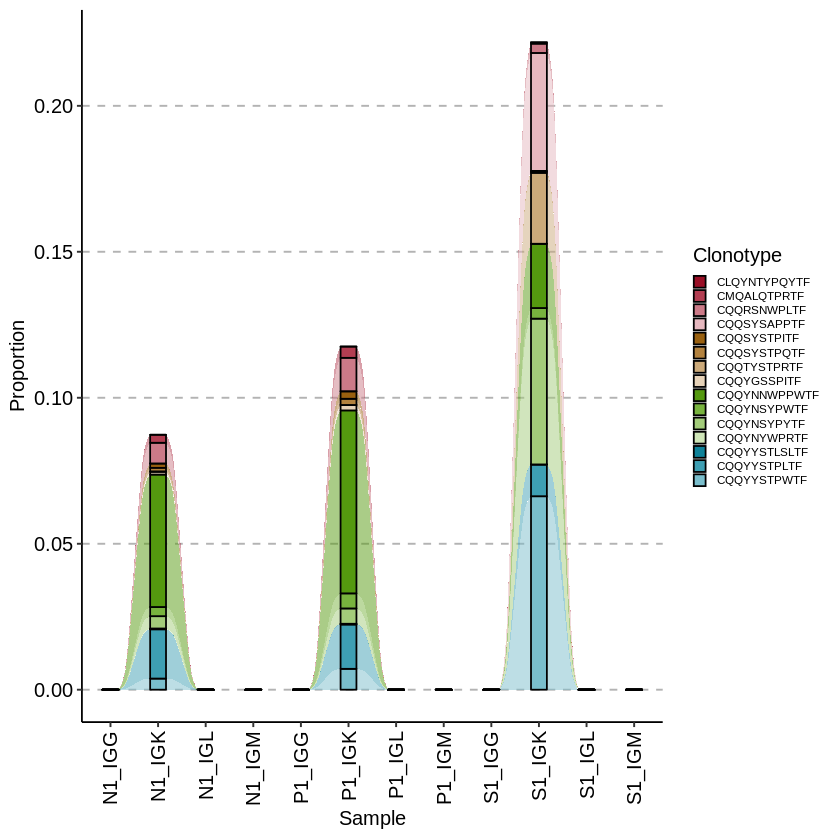

In [5]:
library(pals)
target <- c("CQQYYSTPWTF", "CQQYNSYPYTF", "CQQSYSAPPTF", "CQQTYSTPRTF", "CQQYNNWPPWTF", "CQQYYSTPLTF", "CQQYYSTLSLTF", "CQQSYSTPITF", "CQQYNYWPRTF", "CQQRSNWPLTF", "CQQSYSTPQTF", "CQQYNSYPWTF", "CMQALQTPRTF", "CQQYGSSPITF", "CLQYNTYPQYTF")
tc <- trackClonotypes(immdata$data, target, .col = "aa")
p <- vis(tc) + scale_fill_manual(values=as.vector(stepped(15))) + theme(plot.title = element_blank(), legend.key.size = unit(0.3, 'cm'), legend.key.height = unit(0.3, 'cm'), legend.key.width = unit(0.3, 'cm'), legend.text = element_text(size=7))
p 
ggsave(filename = "FIGURE_p1_IGK_track.png", plot = p, width = 5, height = 4.5, dpi = 600)